# Rejection Sampling

Is a type of exact simulation method. The method works for any distribution in $\mathbf{R}^n$ with a PDF.

Rejection sampling is based on the observation that to sample a random variable in one dimension, one can perform a uniformly random sampling of the two-dimensional Cartesian graph, and keep the samples in the region under the graph of its density function.

First we need a source of random numbers uniformly distributed between 0 and 1.
Given a source of random numbers with such a uniform distribution, we can easily produce a random sequence
with an arbitrary distribution.
Suppose we have a positive function $f(x)$ on the unit interval and we wish to generate points with a weighting proportional to
$f$.
For simplicity assume $f$ is bounded; if not, make a change of variables to make it so.
Without loss of generality, we assume $f(x)$ us bounded by unity.
Using the given random number generator, we obtains a trial number for the first element of our weighted sequence.
Calling this number $x$, we obtain a second random number and accept $x$ if the new random variable is less than $f(x)$.
This is repeated many times to form a sequence of accepted values of $x$.
As the probability of accepting any $x$ is proportional to $f(x)$, the sequence has the desired weighting.

From "Quarks, Gluons, and Lattice", page 132.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import uniform

In [2]:
%%timeit # -r 7 -n 1_000
s = np.random.uniform(0, 1, 100_000)

410 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


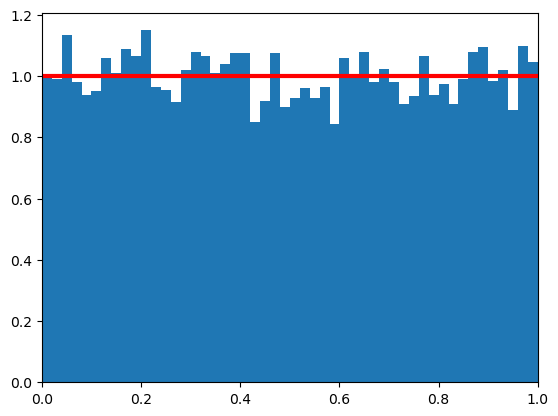

In [3]:
s = np.random.uniform(0, 1, 10_000)

count, bins, ignored = plt.hist(s, 50, density=True)

plt.plot(bins, np.ones_like(bins), linewidth=3, color='r')
plt.xlim(0, 1)
plt.show()

In [4]:
from scipy.stats import norm

approximations left: 1447
0.1% percentile: -3.090232306167813, 99.9% percentile: 3.090232306167813


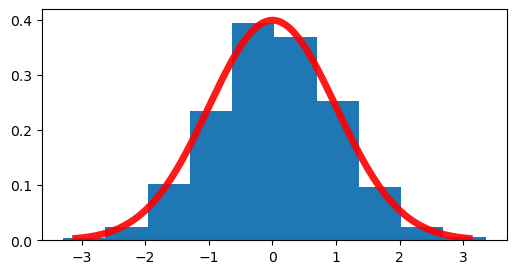

In [15]:
n = 10000
samples = np.random.uniform(-3.5, 3.5, n)
acceptances = np.random.uniform(0, 1, n)
normalize = 3.5 - -3.5

approximations = []
for i in range(len(samples)):
    x = samples[i]
    f_u = norm.pdf(x)
    u = abs(x / normalize)
    
    #print(f"x: {x:0.3f}, u: {u:0.3f}, acceptance: {acceptances[i]:0.3f}, f(u): {f_u:0.3f}, accept: {acceptances[i] < f_u}")
    
    if acceptances[i] < f_u:
        #print(f"x: {x:0.3f}, u: {u:0.3f}, acceptance: {acceptances[i]:0.3f}, f(u): {f_u:0.3f}, accept: {acceptances[i] < f_u}")
        approximations.append(x)

print(f"approximations left: {len(approximations)}")
print(f"0.1% percentile: {norm.ppf(0.001)}, 99.9% percentile: {norm.ppf(0.999)}")

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 200)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.9, label="norm pdf")

ax.hist(approximations, bins=10, density=True)

#ax.legend(loc='best', frameon=False)
fig.show()

In [24]:
import random

def f(x):
    """Target distribution (proportional to): f(x) = x^2."""
    return x ** 2

def rejection_sampling(num_samples, func):
    """Generates samples from a distribution proportional to f(x) on [0, 1] using rejection sampling."""
    samples = []
    
    while len(samples) < num_samples:
        # Generate a trial sample x from a uniform distribution
        x = random.uniform(0, 1)
        # Generate a second random number for acceptance
        accept_prob = random.uniform(0, 1)
        
        # Accept x if the second random number is less than f(x)
        if accept_prob < func(x):
            samples.append(x)
    
    return samples

# Example usage:
num_samples = 10000
samples = rejection_sampling(num_samples, f)
print(f"Generated {len(samples)} samples.")

Generated 10000 samples.


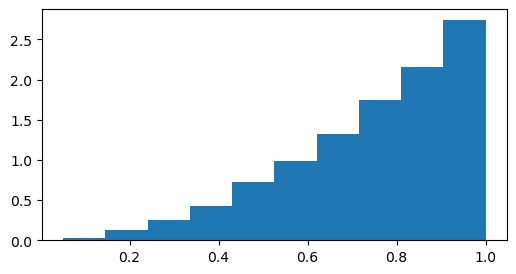

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.hist(samples, bins=10, density=True)

fig.show()

Generated 100000 samples.


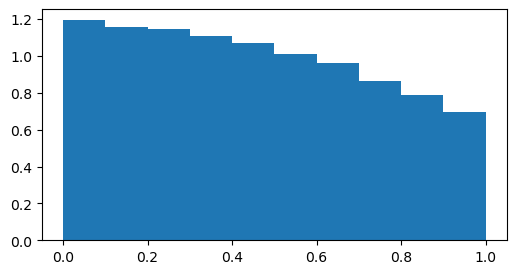

In [26]:
# Example usage:
num_samples = 100000
samples = rejection_sampling(num_samples, np.cos)
print(f"Generated {len(samples)} samples.")

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.hist(samples, bins=10, density=True)

fig.show()